# Assignment 4

╰ᕦ╯(๑• .̫ •๑)╰ᕤ╯

We continue our pokemon trainer adventure with new best friends: non-linear supervised learning algorithms. You teach me, and I'll teach your models. There's no better team!

The data can be found under `pokedex/pokemons.csv`, and is the same as assignment 1, 2, & 3. Run the cell below to get an overview of the dataset:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pokedex/pokemons.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Problem 1

The rainbow bird we spotted in the sky last assignment was Ho-oh, a powerful pokemon who's feathers glow in seven colors 🌈. Inspired by this encounter, we want to improve our legendary pokemon detector. Maybe we'll catch one next time! We know that Support Vector Machines (SVM) can learn non-linear decision boundaries, which could help make better predictions.

💪 **Task: Train a SVM classifier with Radial Basis Function (RBF) kernel which predicts if pokemons are `Legendary`.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- store your trained model in a variable called `svm`
- use the `random_state`, `C`, and `gamma` hyperparameters provided below

In [2]:
random_state = 250
C = 20
gamma = 'scale'

#Importing Standard Scaler and Support Vector Classifier Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Defining the features and label(s).
features = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
label = df['Legendary']

#Standardizing our features
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

#Renaming standardized features and labels in accordance with test norms.
X_scaled = features_scaled
y = label.values

#Training our Support Vector Classifier along the RBF Kernel with given conditions
svc = SVC(kernel = 'rbf', C = C, gamma = gamma, random_state = random_state)
svm = svc.fit(X_scaled, y)

<span style='color:Green'>Perfect 💯 top comments as always! 
</span> 

<span style='color:Green'>functional code & correct method ->  **1 point**</span>

In [3]:
import math

def test_svm():
    assert svm, "Can't find svm, have you used the correct variable name for your model?"
    assert math.isclose(0.984, svm.score(X_scaled, y), rel_tol=1e-3), f"Your model predictions don't look quite right"
    print('Success! 🎉')
    print('Ho-oh was classified as not legendary 😞')
    
test_svm()

Success! 🎉
Ho-oh was classified as not legendary 😞


🧠 **Task: List and describe the main steps that happen during your SVM model's _training_ , i.e inside of sklearn's `.fit()` method.**

🧠 **Bonus Task: Explain the effect of hyperparameters `C` and `gamma` on the SVM's optimization.**

💡**Answer 1:** The data from our dataframe is non-seperable in any direct methods, so getting a clear distinct decision boundary is not possible using regular methods. That's where our Radial Basis Function (***RBF***) kernel and support vector machine (***SVM***) comes into play.

We start with a fixed number of dimensions, usually linked to the essential features of our dataset and then adding higher dimensions of the dataset to find their influence regions. ***RBF*** here adds a new point and tries to classify it with the regions based on its location and relationships to other points.

<span style='color:Green'> 
    You are right that the RBF kernel adds higher dimensional features, and that these have to do with the locations of the examples. I also expected a mention of the large margins, support vectors, and the kernel trick for a complete answer.
    FYI non-linear models are not _always_ the best choice for non-separable data. In fact, sometimes logistic regression can do pretty well with the noisy mixed boundary. However non-_linearly_ separable data does require non-linear methods.
</span> 

<span style='color:Green'>partial answer ->  **0.5 point**</span>

<span style='color:Green'> 
    C and gamma are regularization hyperparameters. C dictates the width of the soft margin, which adds or removes support vectors to contribute to the decision boundary. gamma controls the effective distance of the RBF's kernel's features, so that a large  $\gamma$ creates a more local decision boundary.
</span> 

<span style='color:Green'>no answer ->  **0 point**</span>

## Problem 2

Our SVM failed to recognise that the flamboyant Ho-oh is a legendary pokemon... Fortunately, we know other non-linear classifiers. Random forests are known for their flexibility, so they might fare better here.

💪 **Task: Train a Random Forest classifier which predicts if pokemons are `Legendary`.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- store your trained model in a variable called `random_forest`
- use the `random_state`, `n_estimators`, and `min_samples_leaf` hyperparameters provided below

In [4]:
random_state = 250
n_estimators = 100
min_samples_leaf = 8

#Scaler Pre-Imported, Importing Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

#Features and Labels exactly same to the problem above so,
#existing values from memory can be used.
rfc = RandomForestClassifier(random_state = random_state, n_estimators = n_estimators, min_samples_leaf = min_samples_leaf)
random_forest = rfc.fit(X_scaled, y)

<span style='color:Green'>Perfect 💯 good choice reusing the dataset variables
</span> 

<span style='color:Green'>functional code & correct method ->  **1 point**</span>

In [5]:
def test_random_forest():
    assert random_forest, "Can't find random_forest, have you used the correct variable name for your model?"
    assert math.isclose(0.954, random_forest.score(X_scaled, y), rel_tol=1e-3), f"Your model predictions don't look quite right"
    print('Success! 🎉')
    print('Ho-oh was correctly classified as legendary 😎')
    
test_random_forest()

Success! 🎉
Ho-oh was correctly classified as legendary 😎


🧠 **Task: List and describe the main steps that happen during your random forest model's _training_ , i.e inside of sklearn's `.fit()` method.**

🧠 **Bonus Task: Why do random forests generalize better than decision trees?**

💡**Answer 2:** The Random Forest Model works with decision trees and using these decision trees to calculate the decision boundary and influence regions of our data and its classes. 

Our dataset is taken and random decision trees are made from the features in our dataset. Random features are chosen and used to make a decision tree from random data inside these selected features as various leaves (***nodes***) throughout our decision tree.

This step is repeated until the desired set ***n_estimators*** condition is met. The comparison between these randomly generated decision trees gives us our decision boundary.

<span style='color:Green'> 
    You have the right elements in your answer, but it's good to mention these methods by their name! You have described _bagging_ and _feature bagging_ as the "random features" and "random data" chosen to train the decision trees. The "comparison" you refer to is called _majority voting_. 
</span> 

<span style='color:Green'>comprehensive answer ->  **1 point**</span>

<span style='color:Green'> 
    Random forests generalize better than decision trees because they _average out overfitting_. Since each decision tree is likely to overfit to some data points, the bagging techniques + majority voting make sure that the ensemble model drowns the noise, and instead fits on the underlying patterns, which are more likely to be correctly predicted by the _majority_ of the trees.
</span> 

<span style='color:Green'>no answer ->  **0 point**</span>

## Problem 3

The random forest recognized that Ho-oh is an absolute legend. But we heard that the A.I hype nowadays is all about neural networks... They are notoriously difficult to train, but we are the best trainer there ever was!

💪 **Task: Train a Neural Network classifier which predicts if pokemons are `Legendary`.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- store your trained model in a variable called `nn`
- create a network with 2 hidden layers of 6 neurons each, with ReLU activation
- use the `random_seed`, `optimizer`, `batch_size` and `epochs` hyperparameters provided below

In [6]:
random_seed = 250
optimizer = 'adam'
batch_size=16
epochs=200

#Importing Sequential Model Structure for our Neural Network
from keras.models import Sequential

#Instantiating Dense layers for our Neural Network model.
from keras.layers import Dense

#Scaler Pre-Imported and Features scaled and can be used from memory.

#Training and Storing model according to the stated conditions.
#As per our conditions:

#Features = 6
#Hidden Layers = 2 with Neurons = 6 each.
#Activation layer type = 'relu'

#Non-linear Classifier output so output type = 'sigmoid'
#Output values = 1.

nn = Sequential([
    Dense(6, activation = 'relu', input_dim = 6),
    Dense(6, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

nn.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizer
)

#Importing Tensorflow Backend and setting the random seed and prediction hyperparameters.
import tensorflow as tf

np.random.seed(random_seed)
tf.random.set_seed(random_seed)
history = nn.fit(X_scaled, y, epochs = epochs, batch_size = batch_size)

Using TensorFlow backend.


Epoch 1/200
800/800 [==============================] - 0s 266us/step - loss: 0.6385
Epoch 2/200
800/800 [==============================] - 0s 80us/step - loss: 0.5265
Epoch 3/200
800/800 [==============================] - 0s 74us/step - loss: 0.4235
Epoch 4/200
800/800 [==============================] - 0s 76us/step - loss: 0.3384
Epoch 5/200
800/800 [==============================] - 0s 79us/step - loss: 0.2763
Epoch 6/200
800/800 [==============================] - 0s 68us/step - loss: 0.2383
Epoch 7/200
800/800 [==============================] - 0s 79us/step - loss: 0.2171
Epoch 8/200
800/800 [==============================] - 0s 77us/step - loss: 0.2003
Epoch 9/200
800/800 [==============================] - 0s 64us/step - loss: 0.1870
Epoch 10/200
800/800 [==============================] - 0s 73us/step - loss: 0.1760
Epoch 11/200
800/800 [==============================] - 0s 69us/step - loss: 0.1663
Epoch 12/200
800/800 [==============================] - 0s 64us/step - loss: 0.1582


800/800 [==============================] - 0s 59us/step - loss: 0.0814
Epoch 99/200
800/800 [==============================] - 0s 58us/step - loss: 0.0808
Epoch 100/200
800/800 [==============================] - 0s 60us/step - loss: 0.0805
Epoch 101/200
800/800 [==============================] - 0s 63us/step - loss: 0.0802
Epoch 102/200
800/800 [==============================] - 0s 59us/step - loss: 0.0803
Epoch 103/200
800/800 [==============================] - 0s 59us/step - loss: 0.0802
Epoch 104/200
800/800 [==============================] - 0s 58us/step - loss: 0.0800
Epoch 105/200
800/800 [==============================] - 0s 61us/step - loss: 0.0795
Epoch 106/200
800/800 [==============================] - 0s 60us/step - loss: 0.0794
Epoch 107/200
800/800 [==============================] - 0s 67us/step - loss: 0.0791
Epoch 108/200
800/800 [==============================] - 0s 68us/step - loss: 0.0788
Epoch 109/200
800/800 [==============================] - 0s 62us/step - loss: 0.

800/800 [==============================] - 0s 59us/step - loss: 0.0695
Epoch 195/200
800/800 [==============================] - 0s 58us/step - loss: 0.0699
Epoch 196/200
800/800 [==============================] - 0s 58us/step - loss: 0.0688
Epoch 197/200
800/800 [==============================] - 0s 57us/step - loss: 0.0689
Epoch 198/200
800/800 [==============================] - 0s 60us/step - loss: 0.0694
Epoch 199/200
800/800 [==============================] - 0s 60us/step - loss: 0.0687
Epoch 200/200
800/800 [==============================] - 0s 56us/step - loss: 0.0687


<span style='color:Green'>Perfect 💯
</span> 

<span style='color:Green'>functional code & correct method ->  **1 point**</span>

In [7]:
def test_neural_network():
    assert nn, "Can't find nn, have you used the correct variable name for your model?"
    assert nn.evaluate(X_scaled, y, verbose=0) < 0.1, f"Your model predictions don't look quite right"
    print('Success! 🎉')
    print('Ho-oh was correctly classified as legendary 😎')

test_neural_network()

Success! 🎉
Ho-oh was correctly classified as legendary 😎


🧠 **Task: List and describe the main steps that happen during your neural network's _training_ , i.e inside of keras's `.fit()` method.**

🧠 **Task: List the three different flavours of gradient descent. Which one did we use here? Why is it the most popular?**


🧠 **Bonus Task: If we used a `linear` activation for our hidden layers, would this model be as powerful? why?**

💡**Answer 3(*i*):** We take our scaled feautures and labels and add them to 2 hidden layers in our neural network. Artificial features are made from the calculations based on the weights of the features and their influence which is done by our optimizer of choice alongside their gradient descent. 

Our last layer is the output from where the neural network exits calculated values based on the weights and values from the neurons in the 2 hidden layers.

<span style='color:Green'> 
    You are right describing how the hidden layers calculate artifical features, and alluding to optimizers and gradient descent. For a complete answer, I expected a more in-depth description of how _backpropagation_ uses the _chain rule_ to calculate the _gradients_ with respect to each model weight. That's the main trick in neural networks! 
</span> 

<span style='color:Green'>partial answer ->  **0.5 point**</span>

💡**Answer 3(*ii*):** There are 3 different sorts of gradient descents
- Stochastic
- Batch
- Mini Batch 

Our chosen one is Mini Batch. It's widely popular because of its better capabilities and optimization than the other two options.

In comparison to **Batch**, it uses lesser (more moderate amount) of RAM and is not fixed to descending towards minimum.

Similarly in comparison to **Stochastic**, it doesn't slow down as the progress descends into the neural network.

<span style='color:Green'> 
    Yup, good answer. On top of that, mini-batches that fit in memory can be efficiently parallelized on GPUs 🤑
</span> 

<span style='color:Green'>comprehensive answer ->  **1 point**</span>

## Problem 4

We've trained our neural network, and it seems to correctly predict Ho-oh's legendary status. 💯 We want to dig deeper into its optimization process by looking at its loss curve.

💪 **Task: Visualize your neural network's loss curve.**
- store the model's training history in a variable called `history`
- plot its loss curve
- the curve values should be correct, but you will be mostly graded on your data visualization practices
- revisit data viz tips from lecture 2.6

Text(0.5, 1.0, 'Loss Curve Plot')

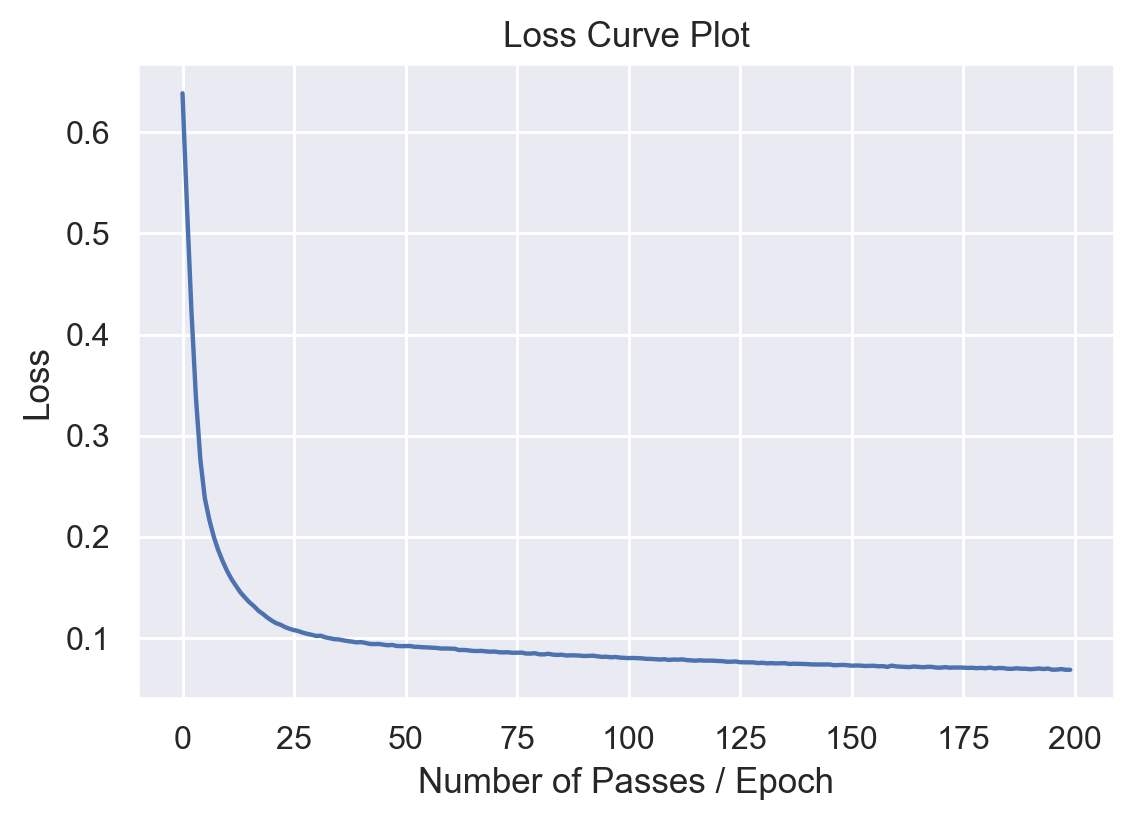

In [8]:
#Model History pre-stored in variable 'history'
#Importing MatplotLib, Seaborn and using plot regression.
import matplotlib.pyplot as plt
import seaborn as sns

#Initializing Seaborn
sns.set()

fig = plt.figure(dpi = 210)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'])
ax.set_xlabel('Number of Passes / Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss Curve Plot')


<span style='color:Green'>Perfect 💯 Nice job adding title and labels, the x-axis can be just "epochs"
</span> 

<span style='color:Green'>functional code & correct method ->  **1 point**</span>

In [9]:
def test_loss_curve():
    assert history, "Can't find `history`, have you save the model's history"
    loss = history.history['loss']
    assert len(loss) == 200, f"There are {len(loss)} loss values. There should be 200, one per epoch"
    assert loss[-1] < 0.1, f"Your final loss: {loss[-1]} should be less than 0.1"
    print('Success! 🎉')
    
    
test_loss_curve()

Success! 🎉


🧠 **Task: What does this loss curve say about our neural network training. Why?**

🧠 **Bonus Task: The loss curve doesn't seem to be converging to a loss of 0. List scenarios that could explain to this behaviour, and describe why.**

💡**Answer 4:** It is safe to say that the graph represents that our choice of optimization methods was not the best. The gradient descent, although present, still is not zero even at 200 passes.

<span style='color:Green'> Actually, this neural network training isn't _all_ that bad. Loss curves don't always tend to zero! You're right that converging to local minima will lead to high asymptotes, but not always. Non-separable data for example could also lead to non-zero optimal loss. So in this case, we can't really be sure of if a local or global minimum was found, all we can assess is that the neural network training converged well.
</span>

<span style='color:Green'>partial answer ->  **0.5 point**</span>

## Problem 5

We were lead by ✨adam✨ in our quest to be a pokemon master, but Professor Oak told us that he might not the messiah. 🙀

💪 **Task: Train Neural Network classifiers with different optimizers. Then compare them by plotting their loss curves.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- train one neural network per optimizer listed in `optimizers`
- each network should have 2 hidden layers of 6 neurons each, with ReLU activation
- use the `random_seed`, `batch_size` and `epochs` hyperparameters provided below
- plot each model's loss curve on the same graph
- revisit data viz tips from lecture 2.6
- the unit test is the graph 🙃

In [10]:
random_seed = 250
batch_size=16
epochs=200
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam']

from timeit import default_timer as timer

def train_neural_network(X, y, optimizer='adam', **kwargs):
    # create model
    model = Sequential([
        Dense(6, activation='relu', input_dim=6),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    # training reproducibility
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)
    
    # train and time model
    start = timer()
    history = model.fit(X, y, **kwargs)
    end = timer()
    
    time = end - start
    return history, time

from collections import namedtuple
from keras.callbacks import Callback

class LossPerBatch(Callback):
    def on_train_begin(self, logs={}):
        self.history = {}
        self.history['loss'] = []

    def on_batch_end(self, batch, logs={}):
        self.history['loss'].append(logs['loss'])

Result = namedtuple('Result', ['optimizer', 'history', 'history_per_batch', 'time'])
results = []

for o in optimizers:
    history_per_batch = LossPerBatch()
    history, time = train_neural_network(X_scaled, y, optimizer=o, batch_size = batch_size, epochs = epochs, callbacks=[history_per_batch])
    results.append(Result(o, history, history_per_batch, time))

Epoch 1/200
800/800 [==============================] - 0s 157us/step - loss: 0.5207
Epoch 2/200
800/800 [==============================] - 0s 71us/step - loss: 0.4540
Epoch 3/200
800/800 [==============================] - 0s 60us/step - loss: 0.4030
Epoch 4/200
800/800 [==============================] - 0s 56us/step - loss: 0.3634
Epoch 5/200
800/800 [==============================] - 0s 52us/step - loss: 0.3328
Epoch 6/200
800/800 [==============================] - 0s 51us/step - loss: 0.3092
Epoch 7/200
800/800 [==============================] - 0s 54us/step - loss: 0.2907
Epoch 8/200
800/800 [==============================] - 0s 51us/step - loss: 0.2756
Epoch 9/200
800/800 [==============================] - 0s 53us/step - loss: 0.2637
Epoch 10/200
800/800 [==============================] - 0s 53us/step - loss: 0.2544
Epoch 11/200
800/800 [==============================] - 0s 52us/step - loss: 0.2469
Epoch 12/200
800/800 [==============================] - 0s 51us/step - loss: 0.2405


800/800 [==============================] - 0s 51us/step - loss: 0.1209
Epoch 99/200
800/800 [==============================] - 0s 51us/step - loss: 0.1206
Epoch 100/200
800/800 [==============================] - 0s 51us/step - loss: 0.1201
Epoch 101/200
800/800 [==============================] - 0s 50us/step - loss: 0.1199
Epoch 102/200
800/800 [==============================] - 0s 51us/step - loss: 0.1195
Epoch 103/200
800/800 [==============================] - 0s 50us/step - loss: 0.1192
Epoch 104/200
800/800 [==============================] - 0s 50us/step - loss: 0.1189
Epoch 105/200
800/800 [==============================] - 0s 52us/step - loss: 0.1186
Epoch 106/200
800/800 [==============================] - 0s 51us/step - loss: 0.1182
Epoch 107/200
800/800 [==============================] - 0s 49us/step - loss: 0.1180
Epoch 108/200
800/800 [==============================] - 0s 51us/step - loss: 0.1176
Epoch 109/200
800/800 [==============================] - 0s 51us/step - loss: 0.

800/800 [==============================] - 0s 51us/step - loss: 0.0973
Epoch 195/200
800/800 [==============================] - 0s 52us/step - loss: 0.0974
Epoch 196/200
800/800 [==============================] - 0s 49us/step - loss: 0.0971
Epoch 197/200
800/800 [==============================] - 0s 49us/step - loss: 0.0972
Epoch 198/200
800/800 [==============================] - 0s 50us/step - loss: 0.0972
Epoch 199/200
800/800 [==============================] - 0s 49us/step - loss: 0.0970
Epoch 200/200
800/800 [==============================] - 0s 49us/step - loss: 0.0968
Epoch 1/200
800/800 [==============================] - 0s 191us/step - loss: 0.5117
Epoch 2/200
800/800 [==============================] - 0s 70us/step - loss: 0.4351
Epoch 3/200
800/800 [==============================] - 0s 58us/step - loss: 0.3661
Epoch 4/200
800/800 [==============================] - 0s 57us/step - loss: 0.3096
Epoch 5/200
800/800 [==============================] - 0s 54us/step - loss: 0.2675
Epo

800/800 [==============================] - 0s 56us/step - loss: 0.1085
Epoch 92/200
800/800 [==============================] - 0s 59us/step - loss: 0.1080
Epoch 93/200
800/800 [==============================] - 0s 53us/step - loss: 0.1070
Epoch 94/200
800/800 [==============================] - 0s 55us/step - loss: 0.1065
Epoch 95/200
800/800 [==============================] - 0s 53us/step - loss: 0.1058
Epoch 96/200
800/800 [==============================] - 0s 53us/step - loss: 0.1050
Epoch 97/200
800/800 [==============================] - 0s 55us/step - loss: 0.1045
Epoch 98/200
800/800 [==============================] - 0s 55us/step - loss: 0.1034
Epoch 99/200
800/800 [==============================] - 0s 54us/step - loss: 0.1029
Epoch 100/200
800/800 [==============================] - 0s 55us/step - loss: 0.1021
Epoch 101/200
800/800 [==============================] - 0s 56us/step - loss: 0.1018
Epoch 102/200
800/800 [==============================] - 0s 53us/step - loss: 0.1004
Ep

800/800 [==============================] - 0s 55us/step - loss: 0.0764
Epoch 188/200
800/800 [==============================] - 0s 54us/step - loss: 0.0759
Epoch 189/200
800/800 [==============================] - 0s 54us/step - loss: 0.0762
Epoch 190/200
800/800 [==============================] - 0s 54us/step - loss: 0.0759
Epoch 191/200
800/800 [==============================] - 0s 54us/step - loss: 0.0761
Epoch 192/200
800/800 [==============================] - 0s 55us/step - loss: 0.0755
Epoch 193/200
800/800 [==============================] - 0s 53us/step - loss: 0.0762
Epoch 194/200
800/800 [==============================] - 0s 55us/step - loss: 0.0760
Epoch 195/200
800/800 [==============================] - 0s 56us/step - loss: 0.0756
Epoch 196/200
800/800 [==============================] - 0s 55us/step - loss: 0.0756
Epoch 197/200
800/800 [==============================] - 0s 54us/step - loss: 0.0757
Epoch 198/200
800/800 [==============================] - 0s 53us/step - loss: 0

800/800 [==============================] - 0s 65us/step - loss: 0.1016
Epoch 85/200
800/800 [==============================] - 0s 62us/step - loss: 0.1010
Epoch 86/200
800/800 [==============================] - 0s 64us/step - loss: 0.1011
Epoch 87/200
800/800 [==============================] - 0s 65us/step - loss: 0.1004
Epoch 88/200
800/800 [==============================] - 0s 63us/step - loss: 0.1001
Epoch 89/200
800/800 [==============================] - 0s 60us/step - loss: 0.1001
Epoch 90/200
800/800 [==============================] - 0s 55us/step - loss: 0.0991
Epoch 91/200
800/800 [==============================] - 0s 60us/step - loss: 0.0984
Epoch 92/200
800/800 [==============================] - 0s 63us/step - loss: 0.0985
Epoch 93/200
800/800 [==============================] - 0s 63us/step - loss: 0.0978
Epoch 94/200
800/800 [==============================] - 0s 61us/step - loss: 0.0977
Epoch 95/200
800/800 [==============================] - 0s 58us/step - loss: 0.0969
Epoch

800/800 [==============================] - 0s 60us/step - loss: 0.0748
Epoch 181/200
800/800 [==============================] - 0s 61us/step - loss: 0.0741
Epoch 182/200
800/800 [==============================] - 0s 63us/step - loss: 0.0743
Epoch 183/200
800/800 [==============================] - 0s 64us/step - loss: 0.0742
Epoch 184/200
800/800 [==============================] - 0s 60us/step - loss: 0.0742
Epoch 185/200
800/800 [==============================] - 0s 59us/step - loss: 0.0743
Epoch 186/200
800/800 [==============================] - 0s 59us/step - loss: 0.0737
Epoch 187/200
800/800 [==============================] - 0s 58us/step - loss: 0.0737
Epoch 188/200
800/800 [==============================] - 0s 58us/step - loss: 0.0742
Epoch 189/200
800/800 [==============================] - 0s 58us/step - loss: 0.0734
Epoch 190/200
800/800 [==============================] - 0s 60us/step - loss: 0.0737
Epoch 191/200
800/800 [==============================] - 0s 60us/step - loss: 0

800/800 [==============================] - 0s 60us/step - loss: 0.1132
Epoch 78/200
800/800 [==============================] - 0s 60us/step - loss: 0.1129
Epoch 79/200
800/800 [==============================] - 0s 58us/step - loss: 0.1124
Epoch 80/200
800/800 [==============================] - 0s 61us/step - loss: 0.1120
Epoch 81/200
800/800 [==============================] - 0s 61us/step - loss: 0.1116
Epoch 82/200
800/800 [==============================] - 0s 61us/step - loss: 0.1110
Epoch 83/200
800/800 [==============================] - 0s 68us/step - loss: 0.1109
Epoch 84/200
800/800 [==============================] - 0s 64us/step - loss: 0.1103
Epoch 85/200
800/800 [==============================] - 0s 61us/step - loss: 0.1100
Epoch 86/200
800/800 [==============================] - 0s 60us/step - loss: 0.1096
Epoch 87/200
800/800 [==============================] - 0s 60us/step - loss: 0.1089
Epoch 88/200
800/800 [==============================] - 0s 74us/step - loss: 0.1089
Epoch

800/800 [==============================] - 0s 59us/step - loss: 0.0907
Epoch 174/200
800/800 [==============================] - 0s 67us/step - loss: 0.0907
Epoch 175/200
800/800 [==============================] - 0s 62us/step - loss: 0.0909
Epoch 176/200
800/800 [==============================] - 0s 62us/step - loss: 0.0906
Epoch 177/200
800/800 [==============================] - 0s 60us/step - loss: 0.0905
Epoch 178/200
800/800 [==============================] - 0s 59us/step - loss: 0.0903
Epoch 179/200
800/800 [==============================] - 0s 63us/step - loss: 0.0903
Epoch 180/200
800/800 [==============================] - 0s 63us/step - loss: 0.0902
Epoch 181/200
800/800 [==============================] - 0s 57us/step - loss: 0.0901
Epoch 182/200
800/800 [==============================] - 0s 57us/step - loss: 0.0901
Epoch 183/200
800/800 [==============================] - 0s 57us/step - loss: 0.0902
Epoch 184/200
800/800 [==============================] - 0s 58us/step - loss: 0

800/800 [==============================] - 0s 52us/step - loss: 0.1516
Epoch 71/200
800/800 [==============================] - 0s 52us/step - loss: 0.1512
Epoch 72/200
800/800 [==============================] - 0s 52us/step - loss: 0.1508
Epoch 73/200
800/800 [==============================] - 0s 52us/step - loss: 0.1504
Epoch 74/200
800/800 [==============================] - 0s 53us/step - loss: 0.1500
Epoch 75/200
800/800 [==============================] - 0s 51us/step - loss: 0.1496
Epoch 76/200
800/800 [==============================] - 0s 52us/step - loss: 0.1492
Epoch 77/200
800/800 [==============================] - 0s 53us/step - loss: 0.1488
Epoch 78/200
800/800 [==============================] - 0s 55us/step - loss: 0.1484
Epoch 79/200
800/800 [==============================] - 0s 56us/step - loss: 0.1480
Epoch 80/200
800/800 [==============================] - 0s 53us/step - loss: 0.1476
Epoch 81/200
800/800 [==============================] - 0s 54us/step - loss: 0.1473
Epoch

800/800 [==============================] - 0s 53us/step - loss: 0.1281
Epoch 167/200
800/800 [==============================] - 0s 52us/step - loss: 0.1280
Epoch 168/200
800/800 [==============================] - 0s 50us/step - loss: 0.1279
Epoch 169/200
800/800 [==============================] - 0s 55us/step - loss: 0.1278
Epoch 170/200
800/800 [==============================] - 0s 54us/step - loss: 0.1276
Epoch 171/200
800/800 [==============================] - 0s 51us/step - loss: 0.1275
Epoch 172/200
800/800 [==============================] - 0s 51us/step - loss: 0.1273
Epoch 173/200
800/800 [==============================] - 0s 51us/step - loss: 0.1272
Epoch 174/200
800/800 [==============================] - 0s 52us/step - loss: 0.1271
Epoch 175/200
800/800 [==============================] - 0s 51us/step - loss: 0.1270
Epoch 176/200
800/800 [==============================] - 0s 51us/step - loss: 0.1269
Epoch 177/200
800/800 [==============================] - 0s 54us/step - loss: 0

800/800 [==============================] - 0s 60us/step - loss: 0.1292
Epoch 64/200
800/800 [==============================] - 0s 59us/step - loss: 0.1286
Epoch 65/200
800/800 [==============================] - 0s 58us/step - loss: 0.1281
Epoch 66/200
800/800 [==============================] - 0s 58us/step - loss: 0.1276
Epoch 67/200
800/800 [==============================] - 0s 57us/step - loss: 0.1270
Epoch 68/200
800/800 [==============================] - 0s 56us/step - loss: 0.1268
Epoch 69/200
800/800 [==============================] - 0s 56us/step - loss: 0.1262
Epoch 70/200
800/800 [==============================] - 0s 56us/step - loss: 0.1257
Epoch 71/200
800/800 [==============================] - 0s 57us/step - loss: 0.1252
Epoch 72/200
800/800 [==============================] - 0s 55us/step - loss: 0.1248
Epoch 73/200
800/800 [==============================] - 0s 57us/step - loss: 0.1243
Epoch 74/200
800/800 [==============================] - 0s 56us/step - loss: 0.1238
Epoch

Epoch 160/200
800/800 [==============================] - 0s 56us/step - loss: 0.1005
Epoch 161/200
800/800 [==============================] - 0s 56us/step - loss: 0.1002
Epoch 162/200
800/800 [==============================] - 0s 57us/step - loss: 0.1000
Epoch 163/200
800/800 [==============================] - 0s 56us/step - loss: 0.1000
Epoch 164/200
800/800 [==============================] - 0s 54us/step - loss: 0.0997
Epoch 165/200
800/800 [==============================] - 0s 55us/step - loss: 0.0996
Epoch 166/200
800/800 [==============================] - 0s 56us/step - loss: 0.0995
Epoch 167/200
800/800 [==============================] - 0s 55us/step - loss: 0.0992
Epoch 168/200
800/800 [==============================] - 0s 55us/step - loss: 0.0994
Epoch 169/200
800/800 [==============================] - 0s 55us/step - loss: 0.0988
Epoch 170/200
800/800 [==============================] - 0s 57us/step - loss: 0.0986
Epoch 171/200
800/800 [==============================] - 0s 54us/

800/800 [==============================] - 0s 65us/step - loss: 0.0910
Epoch 58/200
800/800 [==============================] - 0s 65us/step - loss: 0.0903
Epoch 59/200
800/800 [==============================] - 0s 69us/step - loss: 0.0911
Epoch 60/200
800/800 [==============================] - 0s 67us/step - loss: 0.0897
Epoch 61/200
800/800 [==============================] - 0s 64us/step - loss: 0.0890
Epoch 62/200
800/800 [==============================] - 0s 65us/step - loss: 0.0890
Epoch 63/200
800/800 [==============================] - 0s 65us/step - loss: 0.0877
Epoch 64/200
800/800 [==============================] - 0s 64us/step - loss: 0.0875
Epoch 65/200
800/800 [==============================] - 0s 65us/step - loss: 0.0867
Epoch 66/200
800/800 [==============================] - 0s 67us/step - loss: 0.0864
Epoch 67/200
800/800 [==============================] - 0s 65us/step - loss: 0.0849
Epoch 68/200
800/800 [==============================] - 0s 67us/step - loss: 0.0848
Epoch

800/800 [==============================] - 0s 74us/step - loss: 0.0655
Epoch 155/200
800/800 [==============================] - 0s 68us/step - loss: 0.0657
Epoch 156/200
800/800 [==============================] - 0s 69us/step - loss: 0.0656
Epoch 157/200
800/800 [==============================] - 0s 68us/step - loss: 0.0652
Epoch 158/200
800/800 [==============================] - 0s 63us/step - loss: 0.0654
Epoch 159/200
800/800 [==============================] - 0s 68us/step - loss: 0.0650
Epoch 160/200
800/800 [==============================] - 0s 67us/step - loss: 0.0654
Epoch 161/200
800/800 [==============================] - 0s 63us/step - loss: 0.0661
Epoch 162/200
800/800 [==============================] - 0s 64us/step - loss: 0.0656
Epoch 163/200
800/800 [==============================] - 0s 64us/step - loss: 0.0656
Epoch 164/200
800/800 [==============================] - 0s 63us/step - loss: 0.0645
Epoch 165/200
800/800 [==============================] - 0s 65us/step - loss: 0

Text(0.5, 1.0, 'Loss Curve Plot for Various Optimizers')

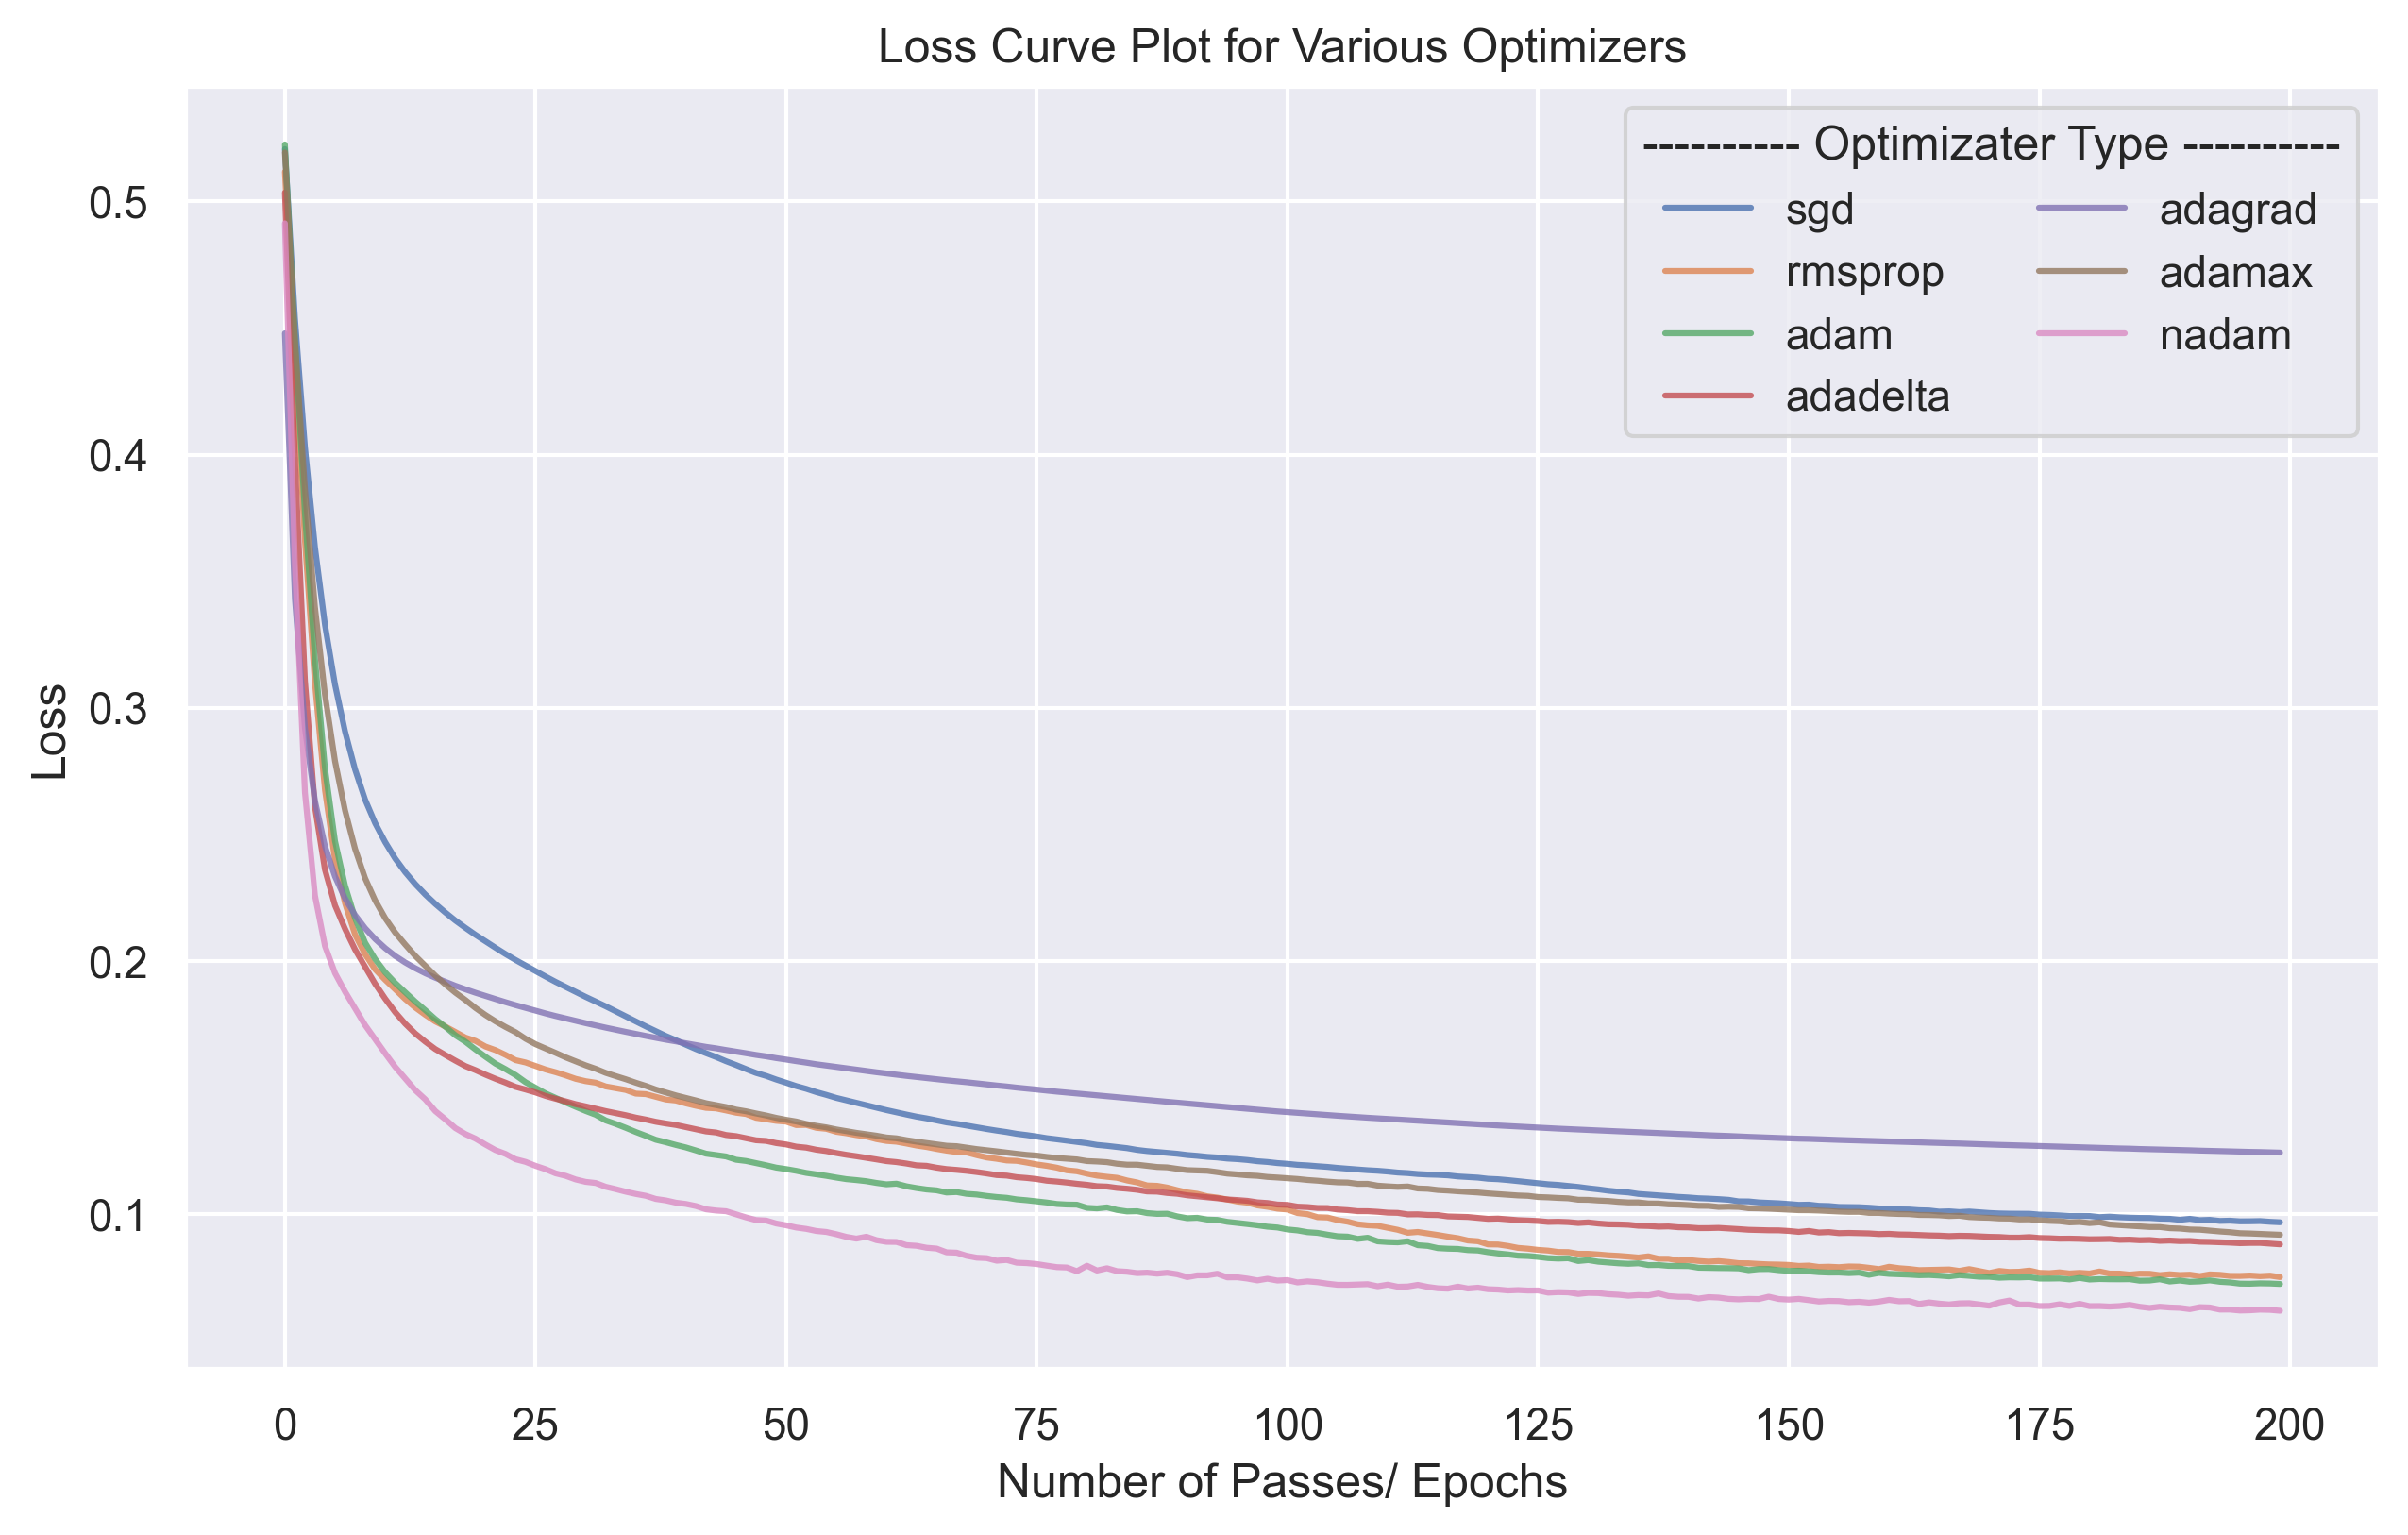

In [11]:
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_subplot(111)

for r in results:
    ax.plot(r.history.history['loss'], label=r.optimizer, alpha=0.8)
    
ax.set_xlabel('Number of Passes/ Epochs')
ax.set_ylabel('Loss')
ax.legend(loc = 'upper right', ncol=2, title = '---------- Optimizater Type ----------');
ax.set_title('Loss Curve Plot for Various Optimizers')

<span style='color:Green'>Great code. You didn't have to record the loss per batch for this particular graph, but good to know how to use callbacks. 💯  
</span> 

<span style='color:Green'>functional code & correct method ->  **1 point**</span>

🧠 **Bonus Task: According to your graph, which is the best optimizer? Explain how this optimizer works _(you might have to look it up in the lecture resources)_.**

🧠 **Bonus Task: The best optimizer on your graph might still not be the best optimizer choice for our neural network. Why?**

<span style='color:Green'>The best optimizer is `nadam`. It's the same `adam`, with added Nesterov momentum.
</span> 

<span style='color:Green'>no answer ->  **0 point**</span>

<span style='color:Green'>`nadam` might be the most _efficient_ optimizer per _epoch_ , but it might take more time to calculate! So another optimizer could be faster, we have to plot the loss curves vs training time to check.
</span> 

<span style='color:Green'>no answer ->  **0 point**</span>

# <span style='color:Green'> Total </span>

<span style='color:Green'> **8.5/10** </span>  

<span style='color:Green'> The code is clean, and well commented. You would have got full marks if your answers were more detailed, and used the technical vocabulary. Flip through the lecture slides if you need a refresher! Other than that, you show a good understanding of the methods, great job!
</span>    